we need to see dataset very carefully here there  is a missing dataset in homeprices.csv 
in our case  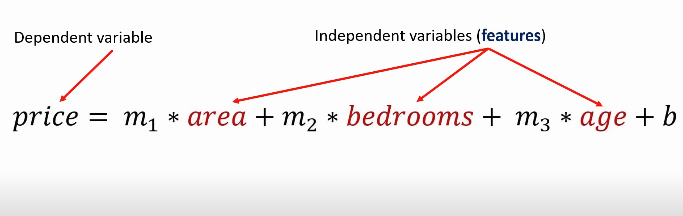

i.e in our case we have 3 independent variable and it can be more as well depening on qwn


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [4]:
df=pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


now we have to handle thata NaN in this case we will take median of that bedrooms

In [9]:
import math
median_bedrooms=math.floor(df.bedrooms.median())
median_bedrooms

4

In [11]:
## fill column Na values using na function available in pandas
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df.bedrooms
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


IMP NOTE:Before applying any ML model we need to pre-process data i.e we need to clean data, data are always messy 

In [13]:
##start training the model
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)
## now it's ready

LinearRegression()

In [14]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [15]:
reg.intercept_

np.float64(221323.0018654043)

In [16]:
reg.predict([[3000,3,40]])

C:\Users\atulm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

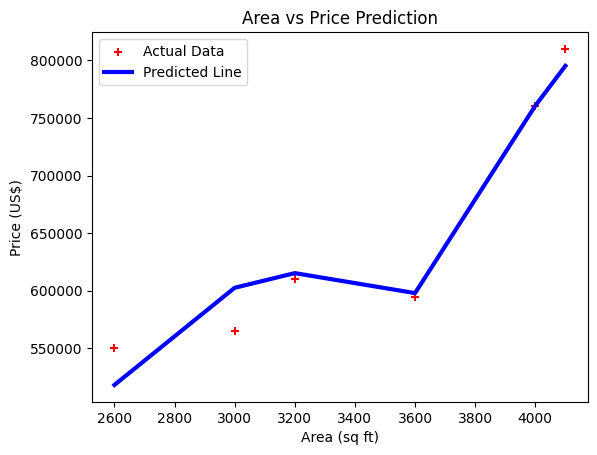

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(df.area, df.price, color='red', marker='+', label="Actual Data")

# Generate predicted prices using the trained model
predicted_prices = reg.predict(df[['area', 'bedrooms', 'age']])

# Plot the regression line
plt.plot(df.area, predicted_prices, color='blue', linewidth=3, label="Predicted Line")

plt.xlabel("Area (sq ft)")
plt.ylabel("Price (US$)")
plt.title("Area vs Price Prediction")
plt.legend()
plt.show()
